In [21]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


data = pd.read_csv('hr-analytics.csv')     #讀取檔案

#記錄哪些欄為非數字
TypeString=list()
nan_num=0
for i in data.columns:
    j=0
    while(type(data[i][j])==type(np.nan)):
        j=j+1
    if type(data[i][j])== type('a'):
        TypeString.append(i)

#記錄哪些欄為數字    
TypeNumber=list()
for i in data.columns:
    if i not in TypeString:
        TypeNumber.append(i)

#是數字的格式
print('Number:',TypeNumber)
print()
#不是數字的數據格式
print('Non-Number:',TypeString)
print()
#缺失值的數量
num = data.isna().sum()
print('The number of NaN:')
num

Number: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']

Non-Number: ['sales', 'salary']

The number of NaN:


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [22]:
#非數字類型的資料進行編碼
data2 = data
data = pd.get_dummies(data)
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [23]:
#資料
temp = list()
for i in data.columns:
    if i != 'left':
        temp.append(i)
#70%訓練集 30%預測集
x_train = data[temp][:-4500]
x_test = data[temp][-4500:]
y_train = data['left'][:-4500]
y_test = data['left'][-4500:]


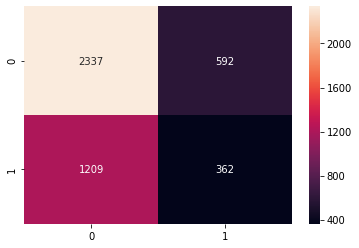

socre: 0.5997777777777777


In [24]:
#Logistic Regression
Class = linear_model.LogisticRegression(solver='liblinear')
Class.fit(x_train, y_train)
y_pred = Class.predict(x_test)
CM = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(CM,annot=True,fmt="d")
plt.show()
print('socre:',metrics.accuracy_score(y_test,y_pred))


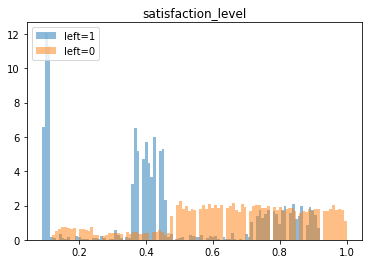

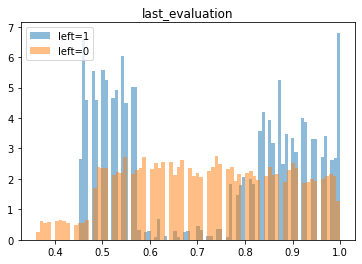

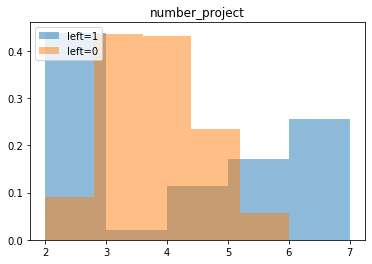

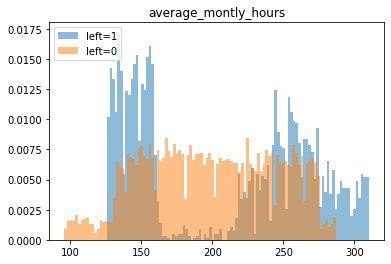

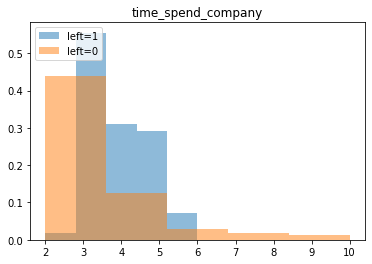

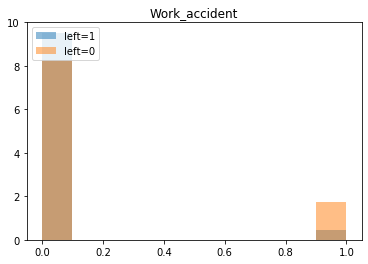

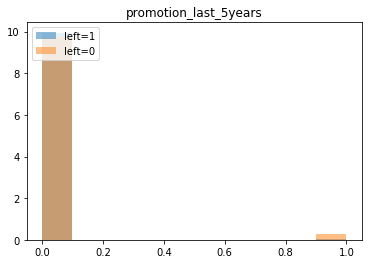

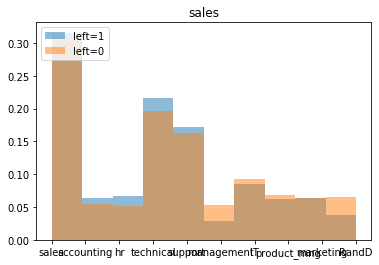

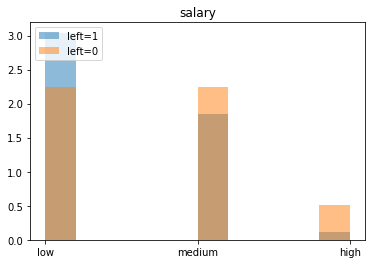

In [25]:
#各個特徵與離職率的探討
#data2['left']
a=list()
b=list()
for i in range(0,data2['satisfaction_level'].size):
    if data2['left'][i]==1:
        a.append(data2['satisfaction_level'][i])
    else:
        b.append(data2['satisfaction_level'][i])
plt.hist(a,bins=100,alpha=0.5,label='left=1',density=1)
plt.hist(b,bins=100,alpha=0.5,label='left=0',density=1)
plt.legend(loc='upper left')
plt.title('satisfaction_level')
plt.show()

a=list()
b=list()
for i in range(0,data2['last_evaluation'].size):
    if data2['left'][i]==1:
        a.append(data2['last_evaluation'][i])
    else:
        b.append(data2['last_evaluation'][i])
plt.hist(a,bins=80,alpha=0.5,label='left=1',density=1)
plt.hist(b,bins=80,alpha=0.5,label='left=0',density=1)
plt.legend(loc='upper left')
plt.title('last_evaluation')
plt.show()

a=list()
b=list()
for i in range(0,data2['number_project'].size):
    if data2['left'][i]==1:
        a.append(data2['number_project'][i])
    else:
        b.append(data2['number_project'][i])
plt.hist(a,bins=5,alpha=0.5,label='left=1',density=1)
plt.hist(b,bins=5,alpha=0.5,label='left=0',density=1)
plt.legend(loc='upper left')
plt.title('number_project')
plt.show()

a=list()
b=list()
for i in range(0,data2['average_montly_hours'].size):
    if data2['left'][i]==1:
        a.append(data2['average_montly_hours'][i])
    else:
        b.append(data2['average_montly_hours'][i])
plt.hist(a,bins=100,alpha=0.5,label='left=1',density=1)
plt.hist(b,bins=100,alpha=0.5,label='left=0',density=1)
plt.legend(loc='upper left')
plt.title('average_montly_hours')
plt.show()

a=list()
b=list()
for i in range(0,data2['time_spend_company'].size):
    if data2['left'][i]==1:
        a.append(data2['time_spend_company'][i])
    else:
        b.append(data2['time_spend_company'][i])
plt.hist(a,bins=5,alpha=0.5,label='left=1',density=1)
plt.hist(b,bins=5,alpha=0.5,label='left=0',density=1)
plt.legend(loc='upper left')
plt.title('time_spend_company')
plt.show()

a=list()
b=list()
for i in range(0,data2['Work_accident'].size):
    if data2['left'][i]==1:
        a.append(data2['Work_accident'][i])
    else:
        b.append(data2['Work_accident'][i])
plt.hist(a,alpha=0.5,label='left=1',density=1)
plt.hist(b,alpha=0.5,label='left=0',density=1)
plt.legend(loc='upper left')
plt.title('Work_accident')
plt.show()

a=list()
b=list()
for i in range(0,data2['promotion_last_5years'].size):
    if data2['left'][i]==1:
        a.append(data2['promotion_last_5years'][i])
    else:
        b.append(data2['promotion_last_5years'][i])
plt.hist(a,alpha=0.5,label='left=1',density=1)
plt.hist(b,alpha=0.5,label='left=0',density=1)
plt.legend(loc='upper left')
plt.title('promotion_last_5years')
plt.show()

a=list()
b=list()
for i in range(0,data2['sales'].size):
    if data2['left'][i]==1:
        a.append(data2['sales'][i])
    else:
        b.append(data2['sales'][i])
plt.hist(a,alpha=0.5,label='left=1',density=1)
plt.hist(b,alpha=0.5,label='left=0',density=1)
plt.legend(loc='upper left')
plt.title('sales')
plt.show()

a=list()
b=list()
for i in range(0,data2['salary'].size):
    if data2['left'][i]==1:
        a.append(data2['salary'][i])
    else:
        b.append(data2['salary'][i])
plt.hist(a,alpha=0.5,label='left=1',density=1)
plt.hist(b,alpha=0.5,label='left=0',density=1)
plt.legend(loc='upper left')
plt.title('salary')
plt.show()

In [1]:
"""
由上圖觀察
satisfaction_level: 有一部分0.8左右的會離開
last_evaluation: 會分成兩邊
number_project: 太多或太少都會想離開
average_monthly_hours: 分成兩堆
time_spend_company: 大致還算線性
"""
#針對這五個特徵去做調整
#資料
"""for i in range(0,x[0].size):
        data['satisfaction_level'][i]=pow(data['satisfaction_level'][i],2)
        data['last_evaluation'][i]=pow(data['last_evaluation'][i],2)
        data['number_project'][i]=pow(data['number_project'][i],2)
        data['average_montly_hours'][i]=pow(data['average_montly_hours'][i],2)
        data['time_spend_company'][i]=pow(data['time_spend_company'][i],2)"""

#70%訓練集 30%預測集
x_train = data[temp][:-4500]
x_test = data[temp][-4500:]
y_train = data['left'][:-4500]
y_test = data['left'][-4500:]

x_train = pd.DataFrame(preprocessing.scale(x_train))
x_test = pd.DataFrame(preprocessing.scale(x_test))

for j in [0,1,2,3,4]:
    for i in range(x_train.shape[0]):
        x_train.iat[i,j]=pow(x_train.iat[i,j],2)
    for i in range(x_test.shape[0]):
        x_test.iat[i,j]=pow(x_test.iat[i,j],2)

#Logistic Regression
Class = linear_model.LogisticRegression(solver='liblinear')
Class.fit(x_train, y_train)
y_pred = Class.predict(x_test)
CM = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(CM,annot=True,fmt="d")
plt.show()
print('socre:',metrics.accuracy_score(y_test,y_pred))

NameError: name 'data' is not defined